In [1]:
# Step 1
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target

print("Step Completed")

Step Completed


In [2]:
# Step 2, 3
print(type(df_X), df_X.shape)
print(type(df_y), df_y.shape)

<class 'numpy.ndarray'> (442, 10)
<class 'numpy.ndarray'> (442,)


In [3]:
# Step 4
from sklearn.model_selection import train_test_split

# Split data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)

for i, feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i} : {feature_name}')

(353, 10) (353,)
(89, 10) (353,)
feature 0 : age
feature 1 : sex
feature 2 : bmi
feature 3 : bp
feature 4 : s1
feature 5 : s2
feature 6 : s3
feature 7 : s4
feature 8 : s5
feature 9 : s6


In [4]:
# Step 5
import numpy as np

num_features = 10
W = np.random.rand(num_features)
b = np.random.rand()

def model(X, W, b):
    pred = 0
    for i in range(num_features):
        pred += X[:, i] * W[i]
    pred += b
    
    return pred

In [5]:
# Step 6
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    
    return mse

def loss(X, W, b, y):
    pred = model(X, W, b)
    loss = MSE(pred, y)
    
    return loss

In [6]:
# Step 7
def delop(X, W, b, y):
    N = len(y) # N is the number of samples
    
    y_pred = model(X, W, b)
    dW = 1 / N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    
    return dW, db

# Testing the gradient func
dW, db = delop(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [-1.85302013 -0.10373444 -4.97573185 -3.71177902 -1.30303699 -0.89130836
  3.11193446 -3.26832589 -4.47511535 -3.51373229]
db: -307.4578218306856


In [7]:
# Step 8
LEARNING_RATE = 0.5

In [8]:
# Step 9
num_iter = 1000
losses = []

for i in range(0, num_iter):
    dW, db = delop(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 0 : Loss 6021.4859
Iteration 10 : Loss 5658.0888
Iteration 20 : Loss 5347.4264
Iteration 30 : Loss 5081.1439
Iteration 40 : Loss 4852.2501
Iteration 50 : Loss 4654.8926
Iteration 60 : Loss 4484.1703
Iteration 70 : Loss 4335.9769
Iteration 80 : Loss 4206.8698
Iteration 90 : Loss 4093.9619
Iteration 100 : Loss 3994.8295
Iteration 110 : Loss 3907.4370
Iteration 120 : Loss 3830.0732
Iteration 130 : Loss 3761.2979
Iteration 140 : Loss 3699.8982
Iteration 150 : Loss 3644.8512
Iteration 160 : Loss 3595.2931
Iteration 170 : Loss 3550.4936
Iteration 180 : Loss 3509.8339
Iteration 190 : Loss 3472.7894
Iteration 200 : Loss 3438.9138
Iteration 210 : Loss 3407.8270
Iteration 220 : Loss 3379.2046
Iteration 230 : Loss 3352.7688
Iteration 240 : Loss 3328.2813
Iteration 250 : Loss 3305.5368
Iteration 260 : Loss 3284.3584
Iteration 270 : Loss 3264.5925
Iteration 280 : Loss 3246.1059
Iteration 290 : Loss 3228.7822
Iteration 300 : Loss 3212.5195
Iteration 310 : Loss 3197.2284
Iteration 320 : Los

In [9]:
# Step 10
print ("W:", W, "\nb:", b)

pred = model(X_test, W, b)
loss_X_test = loss(X_test, W, b, y_test)
print("\nMSE for X_test w/ the trained model:", loss_X_test)

W: [  41.90446223 -203.23296205  509.74980245  324.96778976  -70.76240309
 -119.4689366  -216.18160566  144.41167529  376.53925967  111.84780224] 
b: 151.37254822409574

MSE for X_test w/ the trained model: 2866.9267669113215


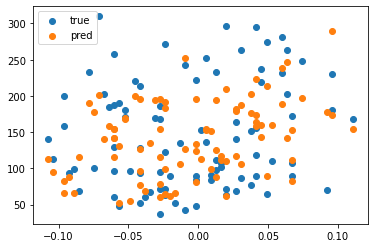

Note that x-axis represents the age of patients, which looks weird because it's normalized about zero


In [10]:
# Step 11
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], pred, label="pred")
plt.legend()
plt.show()
print("Note that x-axis represents the age of patients, which looks weird because it's normalized about zero")